# CS 6476 Project 1: Image Filtering and Hybrid Images

All projects in this course will be done with these iPython notebooks. These are convenient ways for you to quickly and easily interact with the code. A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).

If there are any notes you wish to leave for the TAs as they test your code, you may leave them here.

## Setup

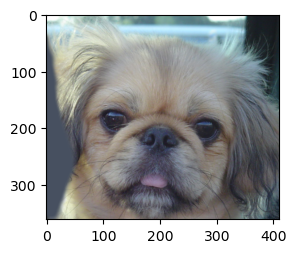

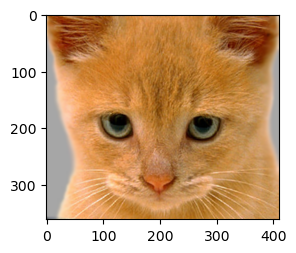

In [2]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from utils import vis_hybrid_image, load_image, save_image, im_range
from student_code import my_imfilter, create_hybrid_image, my_imfilter2
%load_ext autoreload
%autoreload 2

image1 = load_image('../data/dog.bmp')
image2 = load_image('../data/cat.bmp')

# display the dog and cat images
plt.figure(figsize=(3,3)); plt.imshow((image1*255).astype(np.uint8));
plt.figure(figsize=(3,3)); plt.imshow((image2*255).astype(np.uint8));

image_plane = load_image('../data/plane.bmp')
image_bird = load_image('../data/bird.bmp')
image_fish = load_image('../data/fish.bmp')
image_submarine = load_image('../data/submarine.bmp')

## Create filter

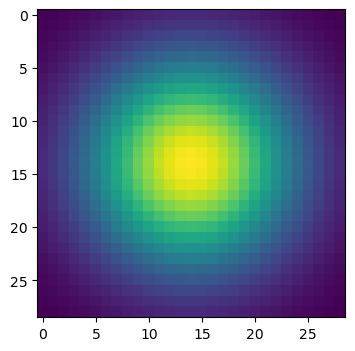

In [3]:
cutoff_frequency = 7
filter = cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,
                               sigma=cutoff_frequency)
filter = np.dot(filter, filter.T)

# let's take a look at the filter!
plt.figure(figsize=(4,4)); plt.imshow(filter);

## Apply filter to image
Both functions you need to implement in this project can be found in _student_\__code.py_. Start by implementing _my_\__imfilter_, which takes both a filter and an image, and returns the filtered image. This code block will use your _my_\__imfilter_ function to create and display a blurry version of the dog image.

In [10]:
## 下面是时间测试：
import time
test_image = cv2.resize(image1, (0, 0), fx=2, fy=2)
t = time.time()
large_blur_image = my_imfilter(test_image, filter)
t = time.time() - t
print('better filter {:f} seconds'.format(t))
t = time.time()
large_blur_image = my_imfilter2(test_image, filter)
t = time.time() - t
print('the simplest way to realize {:f} seconds'.format(t))

better filter 7.628144 seconds
the simplest way to realize 22.384680 seconds


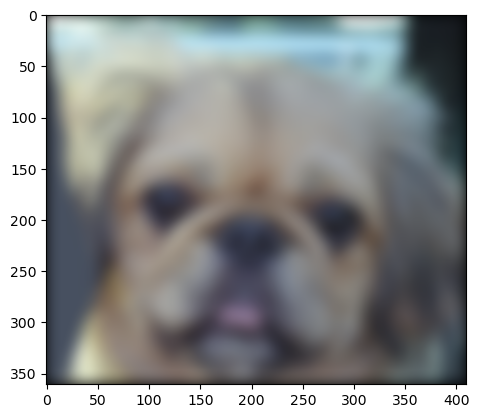

In [5]:
blurry_dog = my_imfilter(image1, filter)
plt.figure(); plt.imshow((blurry_dog*255).astype(np.uint8));

## Create hybrid image
Next, implement _create_\__hybrid_\__image_, which takes two images and makes a hybrid image using the low frequency content from one image and the high frequency content from another.

In [6]:
low_frequencies, high_frequencies, hybrid_image = create_hybrid_image(image1, image2, filter)
vis = vis_hybrid_image(hybrid_image)


# self:
low_frequencies, high_frequencies, hybrid_image = create_hybrid_image(image_fish, image_submarine, filter)
vis2 = vis_hybrid_image(hybrid_image)

low_frequencies, high_frequencies, hybrid_image = create_hybrid_image(image_plane, image_bird, filter)
vis3 = vis_hybrid_image(hybrid_image)

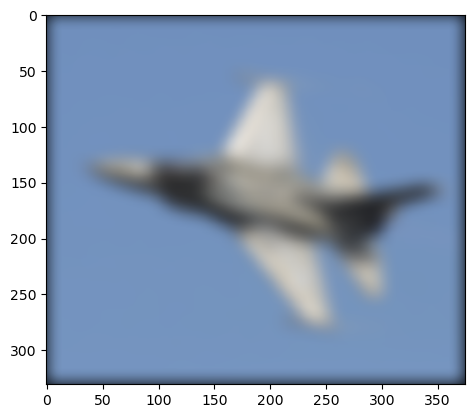

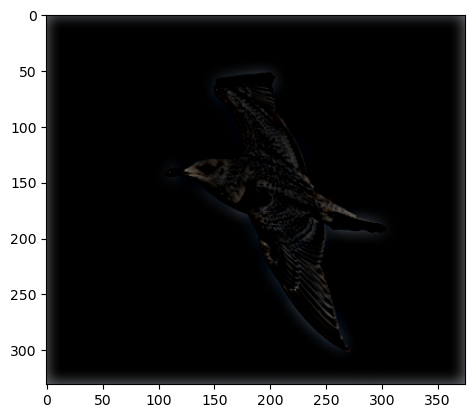

In [7]:
plt.figure(); plt.imshow((low_frequencies*255).astype(np.uint8));
plt.figure(); plt.imshow((high_frequencies*255).astype(np.uint8));

## Show results

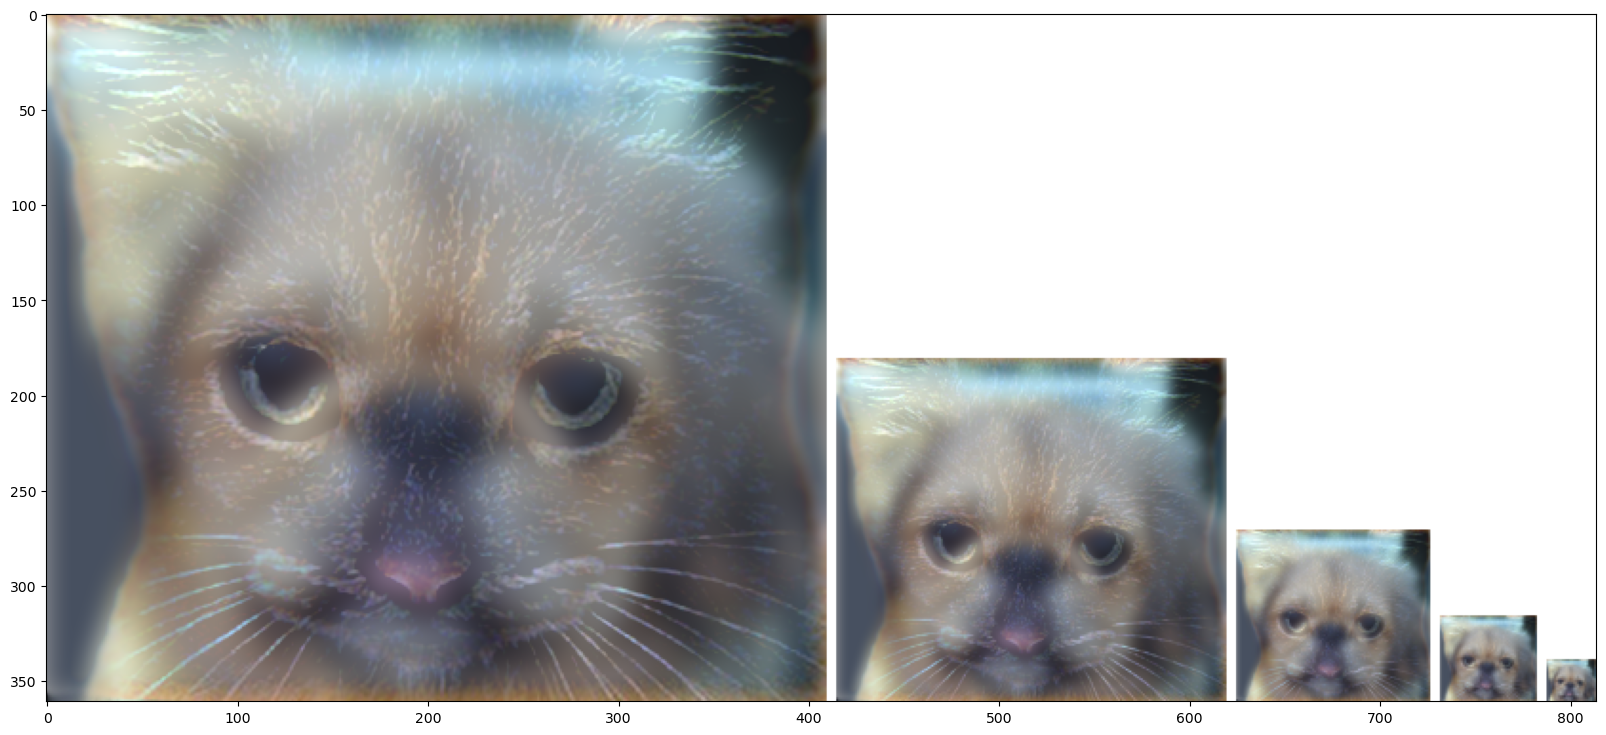

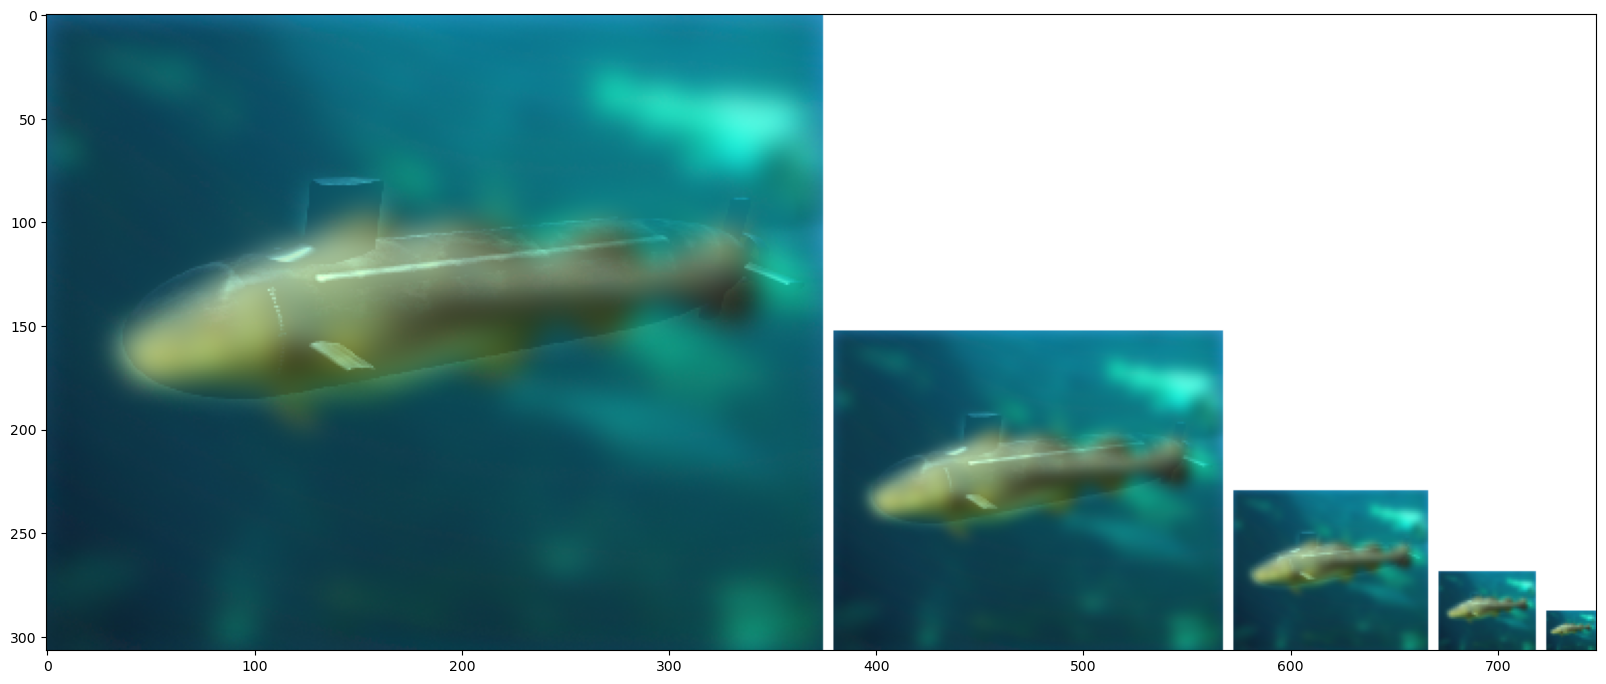

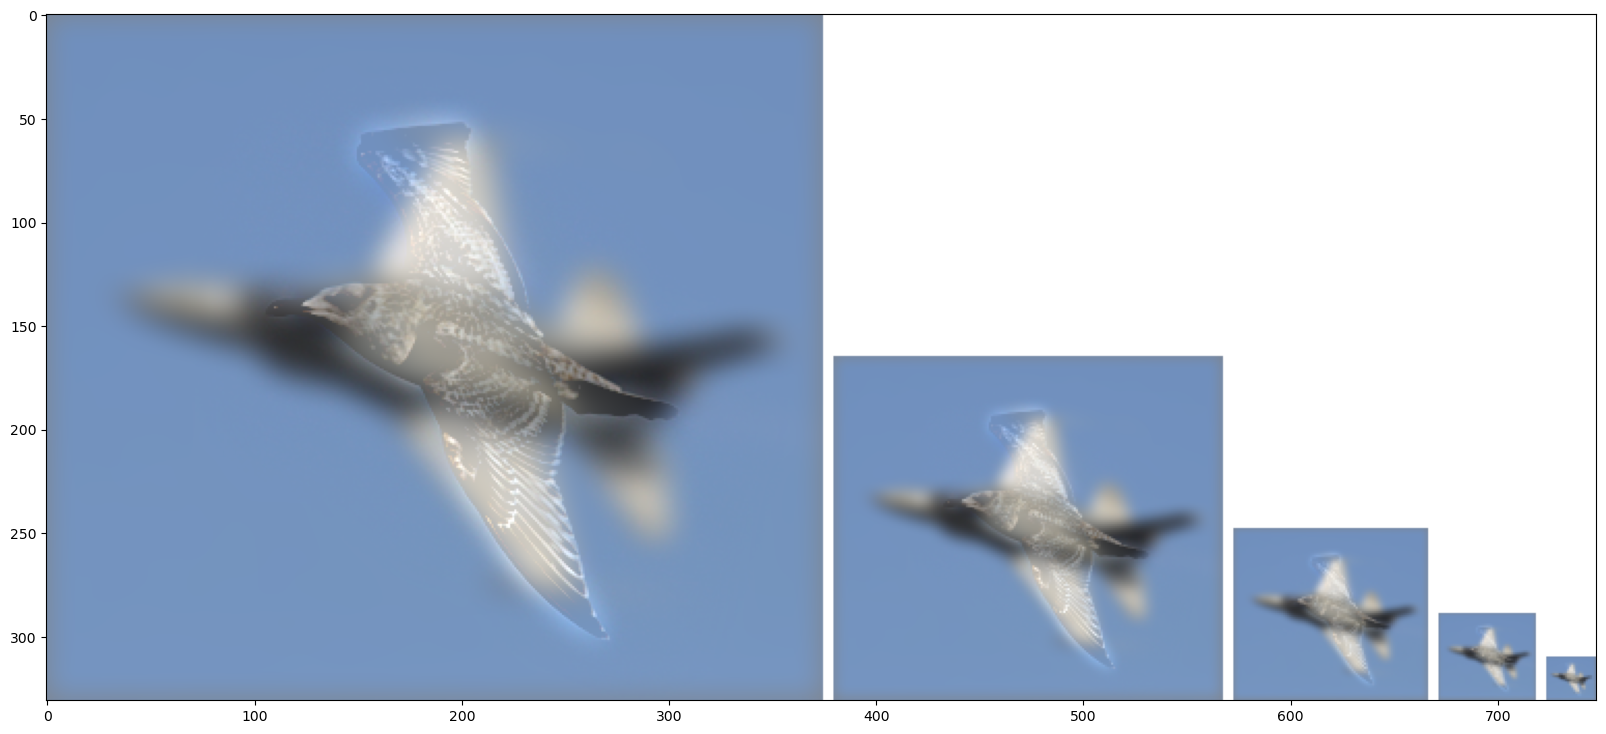

In [8]:
# 检查高频、低频图像是否正确，若不正确请检查是否已调整图像强度值到[0,1]范围内

plt.figure(figsize=(20, 20)); plt.imshow(vis);

plt.figure(figsize=(20, 20)); plt.imshow(vis2);
plt.figure(figsize=(20, 20)); plt.imshow(vis3);

## Save results

In [9]:
save_image('../results/low_frequencies.jpg', low_frequencies)
save_image('../results/high_frequencies.jpg', high_frequencies)
save_image('../results/hybrid_image.jpg', hybrid_image)
save_image('../results/hybrid_image_scales.jpg', vis)
save_image('../results/hybrid_image_scales2.jpg', vis2)
save_image('../results/hybrid_image_scales3.jpg', vis3)

True